In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_excel('./drive/My Drive/Reserach Work/MG Sir/Pritam/Database/all_new_data_1.xlsx')

#SS: 0, IM = 1 AND AM =2

In [ ]:
data.columns

Index(['phase', 'vec', 'diffn', 'diffr', 'mixingh', 'mixinge'], dtype='object')

In [ ]:
datatypes = data.dtypes
print(datatypes)

phase       object
vec        float64
diffn      float64
diffr      float64
mixingh    float64
mixinge    float64
dtype: object


In [ ]:
data.shape

(322, 6)

In [ ]:
X = data[['vec', 'diffn', 'diffr', 'mixingh', 'mixinge']]
y = data[['phase']]

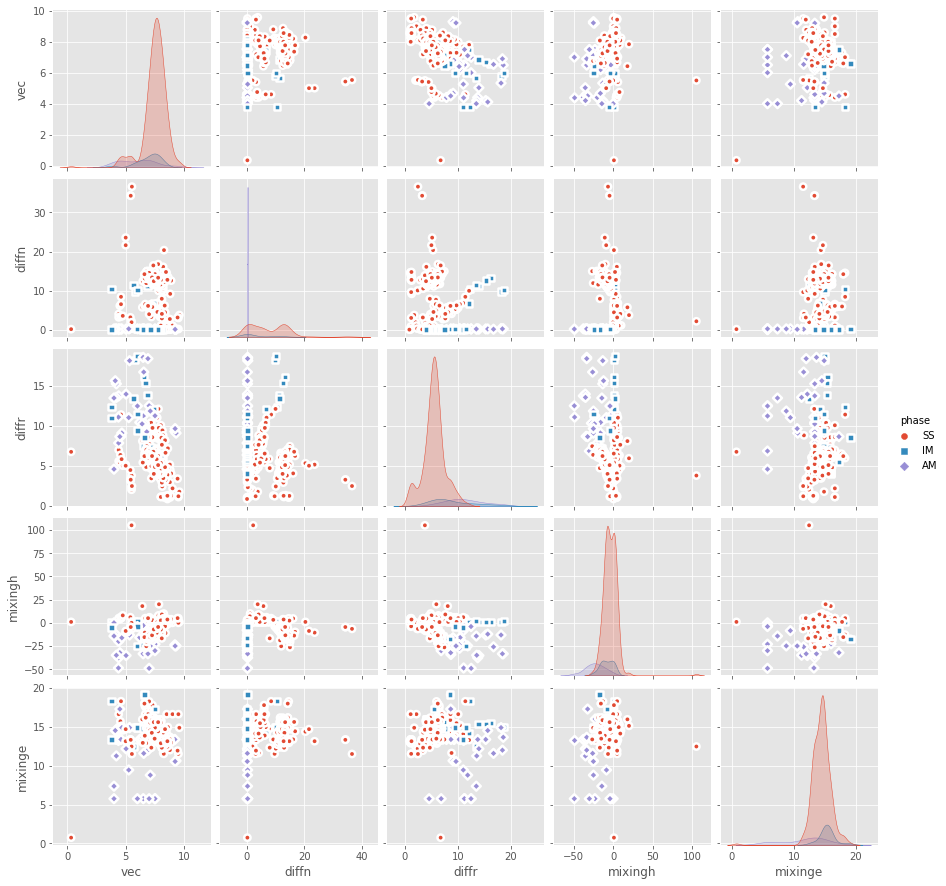

In [ ]:
#Pairplot Design 
#Weblink: https://python-graph-gallery.com/111-custom-correlogram
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, kind="scatter", hue = "phase", markers=["o", "s", "D"], plot_kws=dict(s=40, edgecolor="white", linewidth=2.5))
plt.show()

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


Class=2, n=258 (80.124%)
Class=1, n=31 (9.627%)
Class=0, n=33 (10.248%)


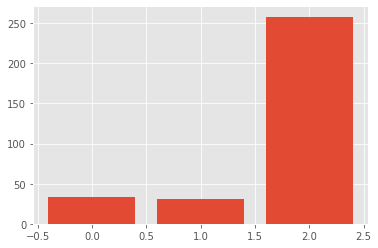

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location


# split into input and output elements
#X, y = data[0:4], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=258 (33.333%)
Class=1, n=258 (33.333%)
Class=0, n=258 (33.333%)


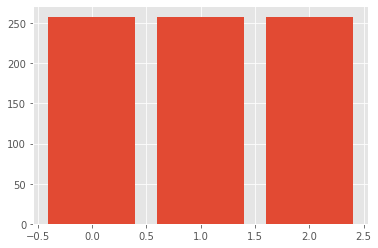

In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
y.shape

(774,)

#Voting Classfier
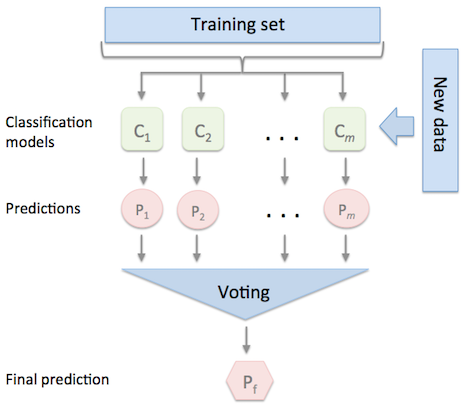

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
kfold = model_selection.KFold(n_splits=10, random_state=None)

#Selecting model by Voting Classifier

#kaggle
https://www.kaggle.com/code/saurabhshahane/voting-classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.9161290322580645
LogisticRegression : 0.896774193548387
ExtraTreesClassifier : 0.9806451612903225
DecisionTree : 0.9354838709677419
RandomForest : 0.9548387096774194
Naive Bayes : 0.7677419354838709
KNeighbours : 0.9741935483870968
SVM : 0.9354838709677419
AdaBoostClassifier : 0.8387096774193549
GradientBoostingClassifier:  0.9612903225806452
XGB : 0.9741935483870968
CatBoost : 0.9806451612903225


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = CatBoostClassifier(logging_level='Silent')
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()
clf5 = KNeighborsClassifier()
clf6 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('ExTrees', clf1), ('CatBoost', clf2), ('RF', clf3), ('DT', clf4), ('knn', clf5), ('xgb', clf6)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.96      0.98      0.97        52
           2       1.00      1.00      1.00        56

    accuracy                           0.98       155
   macro avg       0.98      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



Accuracy is Logistic:  0.9870967741935484


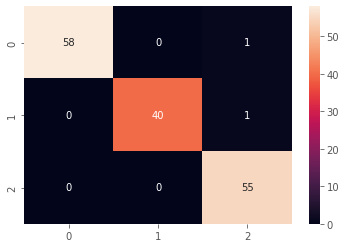

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,eclf1.predict(X_test))
ac = accuracy_score(y_test,eclf1.predict(X_test))
print('Accuracy is Logistic: ',ac)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf1,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf3,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf4,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf5,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf6,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.9758064516129032, 0.9645161290322581, 0.9628767847699631, 0.930618720253834, 0.9548387096774194, 0.9612903225806452]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1.fit(X_train, y_train)
clf3.fit(X_train, y_train)
importances = clf1.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

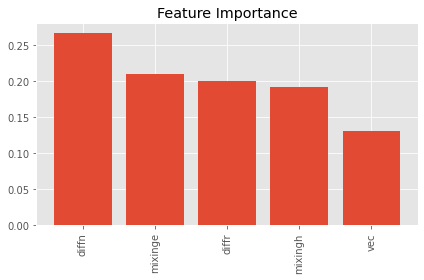

In [ ]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
# 3 is for 